### IMT 574 Final Project - Group 2 

Collaborators: Khoi Nguyen-Davis, Rahul Rastogi, Ankitha Ballal, Disha Santhosh

Dataset used: https://www.kaggle.com/datasets/jockeroika/life-style-data?resource=download

#### Data Loading and Overview

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix, classification_report
from math import sqrt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [23]:
df = pd.read_csv("/Users/dishasanthosh/Desktop/Group 2-IMT574/Data/Final_data.csv")

In [24]:
#checking the overall structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

No missing values: every column shows 20,000 non-null entries.

Dtypes mix: 39 numerical (float64) and 15 categorical (object) 

In [25]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
19179,22.94,Female,116.33,1.79,177.80,126.72,69.25,1.00,960.00,Cardio,33.317305,3.40,4.00,2.00,36.31,1.98,1.02,293.94,117.62,78.15,3103.0,Other,Snack,Vegetarian,0.22,1442.59,171.30,133.10,Steamed,13.22,92.00,3.00,Shoulder Press,4.99,17.05,Strengthens lower abs,346.52,Quadriceps,Box or Platform,Intermediate,Shoulders,Grip Strength,Fat grip dumbbell curl,36.306607,2349.59,0.500411,1.011089,0.529433,0.712711,2143.00,77.571979,693.0400,7.971255e+19,Medium
4320,26.04,Male,54.30,1.53,175.12,148.64,54.03,1.14,751.72,Yoga,25.825642,1.70,2.98,1.00,23.20,3.01,0.03,277.26,110.99,74.65,1527.0,Other,Lunch,Vegan,31.09,1853.81,254.05,169.80,Baked,8.34,112.62,3.49,Dips,5.00,18.02,Builds lower body power and endurance,363.96,"Upper Chest, Triceps",Pull-up Bar,Advanced,Forearms,Upper,Incline dumbbell flyes,23.196207,2224.85,0.498479,2.044015,0.781320,0.848789,775.28,40.276677,829.8288,1.190492e+20,Very High
17430,37.17,Male,73.17,1.76,192.45,120.72,52.01,1.20,1149.12,Cardio,20.512698,1.91,3.00,1.97,23.62,2.00,1.03,213.59,84.77,56.08,1854.0,Other,Snack,Low-Carb,18.88,1900.98,204.21,332.32,Raw,23.77,101.63,1.27,Inverted Rows,4.01,18.02,Targets biceps and forearms,333.14,"Shoulders, Upper Back",Resistance Band or Cable Machine,Advanced,Chest,Middle,Concentration curls,23.621513,1698.16,0.503109,1.158535,0.489248,0.627280,704.88,58.160859,799.5360,5.778932e+19,Low
4527,50.90,Female,109.91,1.78,181.88,156.74,63.82,0.54,356.40,Yoga,32.643807,3.31,3.01,1.00,34.69,2.99,-0.03,177.90,71.56,48.36,2846.0,Other,Dinner,Paleo,28.09,149.61,238.86,138.86,Baked,11.85,20.70,4.80,Thrusters,5.00,18.98,Targets lower abs,347.00,"Lower Abs, Hip Flexors",Bench or Step,Intermediate,Arms,Wrist Extensors,Leg press,34.689433,1433.08,0.496553,0.651078,0.787057,0.861777,2489.60,74.031192,374.7600,8.061895e+19,Medium
2006,47.98,Female,72.89,1.83,193.80,131.17,71.20,1.05,1008.00,Cardio,23.838703,2.82,4.01,2.00,21.77,3.00,0.00,230.70,92.32,61.47,1925.0,Other,Lunch,Low-Carb,32.41,1082.68,122.68,497.58,Steamed,45.48,34.58,1.48,Decline Push-ups,4.00,20.05,Improves shoulder mobility and posture,360.09,"Chest, Triceps",Wall,Beginner,Abs,Wrist Extensors,Incline cable crossovers,21.765356,1845.31,0.500079,1.266566,0.489152,0.676832,917.00,55.513969,756.1890,1.090940e+20,High


In [26]:
#checking for invalid values
invalid_mask = df.isin(['?', 'n/a', 'N/A', 'na', 'NA', 'NaN'])
invalid_counts = invalid_mask.sum().sort_values(ascending=False)

invalid_counts[invalid_counts > 0]


Series([], dtype: int64)

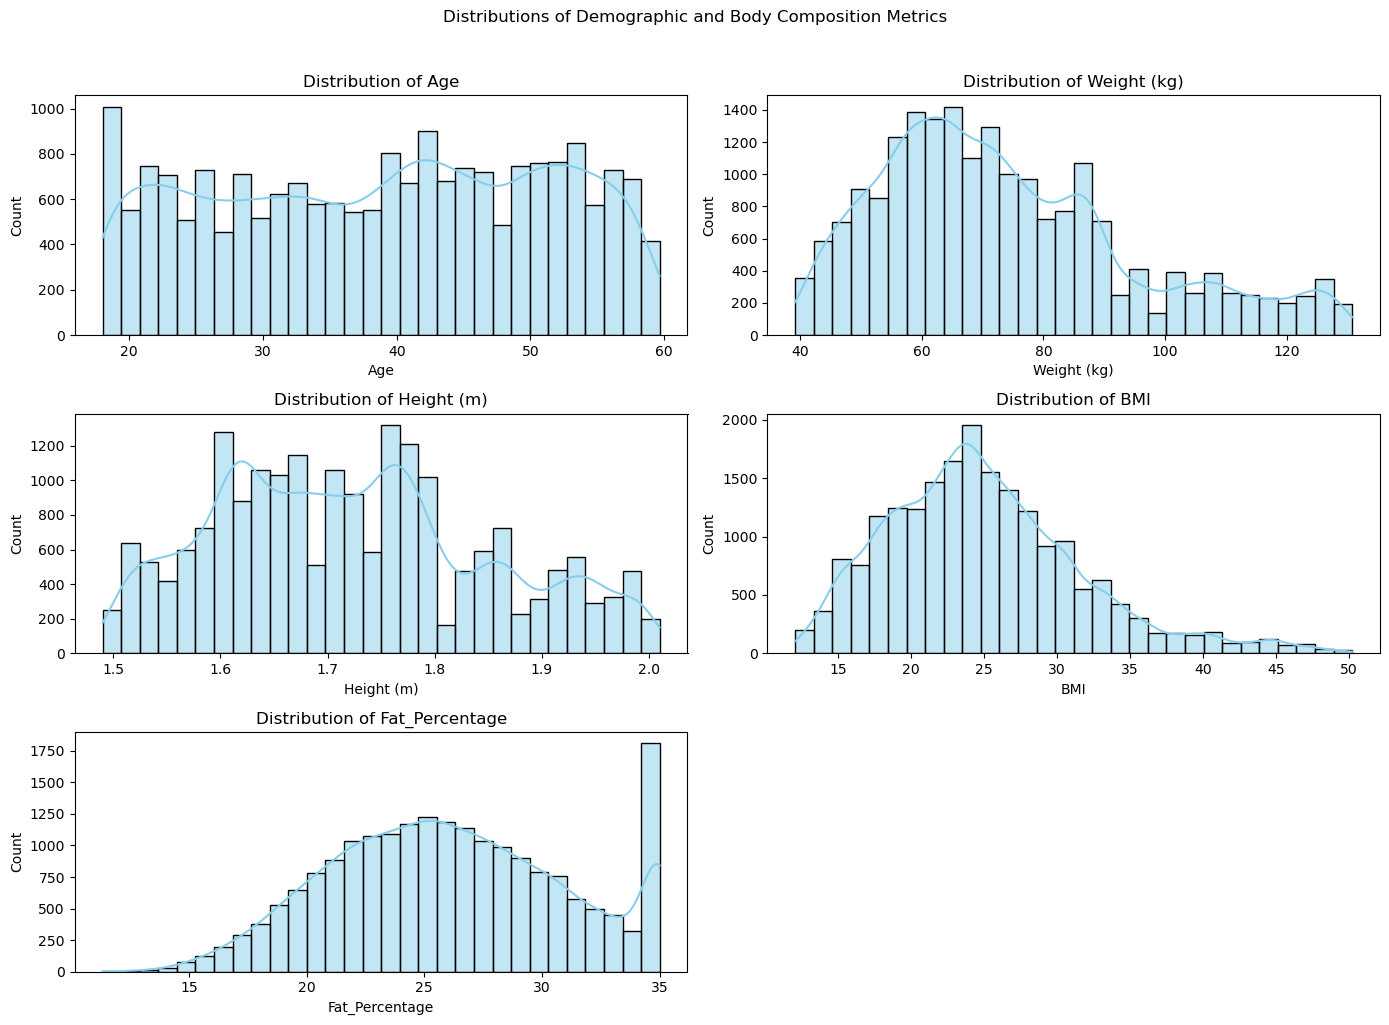

In [27]:
#study the distribution of demographics and health stats
demo_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage']

plt.figure(figsize=(14, 10))
for i, col in enumerate(demo_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
plt.suptitle("Distributions of Demographic and Body Composition Metrics",y=1.02)
plt.tight_layout()
plt.show()

RQ1: Calorie Burn Prediction

To what extent can biometric (age, gender, BMI) and workout features (duration, type, BPM) predict calories burned in a session?


BMI, Weight and Fat_Percentage show very string positive correlation. 
Calories_Burned shows weak correlation with Age, Weight, Height or BMI- indicating Calories_burned shows weak correlation with static attributes.

In [28]:
RANDOM_STATE = 42
df = pd.read_csv("/Users/dishasanthosh/Desktop/Group 2-IMT574/Data/Final_data.csv")

corr = df.corr(numeric_only=True)["Calories_Burned"].sort_values(ascending=False)
print(corr)

Calories_Burned                   1.000000
Session_Duration (hours)          0.814368
expected_burn                     0.773932
Experience_Level                  0.697116
Workout_Frequency (days/week)     0.582787
Water_Intake (liters)             0.262731
cholesterol_mg                    0.072296
Physical exercise                 0.049113
Calories                          0.047981
Reps                              0.043237
serving_size_g                    0.029458
Daily meals frequency             0.028158
rating                            0.025625
Sets                              0.024164
lean_mass_kg                      0.023134
Carbs                             0.011929
cal_from_macros                   0.011817
Fats                              0.011769
Proteins                          0.011602
pct_HRR                           0.010506
pct_carbs                         0.009419
Height (m)                        0.009211
Avg_BPM                           0.007984
Burns Calor

In [29]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[()/%-]", "_", regex=True)
)

In [30]:
TARGET_COL = "Calories_Burned"

# Dropping redundant columns 
for col in ["Burns_Calories_Bin", "Burns_Calories_per_30_min_bc", "expected_burn"]:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

# Dropping rows with missing target
df = df.dropna(subset=[TARGET_COL])

# Choosing features
features = [
    "Session_Duration__hours_",
    "Avg_BPM",
    "Weight_kg",
    "Height__m_",
    "Age",
    "Workout_Frequency__days_week_",
    "Experience_Level",
]

features = [f for f in features if f in df.columns]

X = df[features]
y = df[TARGET_COL]


In [31]:
# Imputing missing values
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

In [32]:
#Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

In [33]:
#Spliiting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=RANDOM_STATE)

In [34]:
#fitting multiple linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict
y_pred = linreg.predict(X_test)

In [35]:
#model evaluation with metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n=== MULTIPLE LINEAR REGRESSION RESULTS =====")
print(f"R² Score: {r2:.3f}")
print(f"MAE:      {mae:.2f} calories")
print(f"RMSE:     {rmse:.2f} calories")


=== MULTIPLE LINEAR REGRESSION RESULTS =====
R² Score: 0.667
MAE:      229.35 calories
RMSE:     288.18 calories


In [36]:
#coeffs
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\n===== FEATURE CONTRIBUTIONS =====")
display(coef_df)

# # Plot feature importance
# plt.figure(figsize=(8,5))
# sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")
# plt.title("Contribution of Each Variable to Calories Burned")
# plt.show()




===== FEATURE CONTRIBUTIONS =====


,Feature,Coefficient
0,Session_Duration__hours_,335.281313
5,Experience_Level,100.125690
2,Height__m_,0.673036
3,Age,-0.867927
1,Avg_BPM,-0.895992
4,Workout_Frequency__days_week_,-0.954906


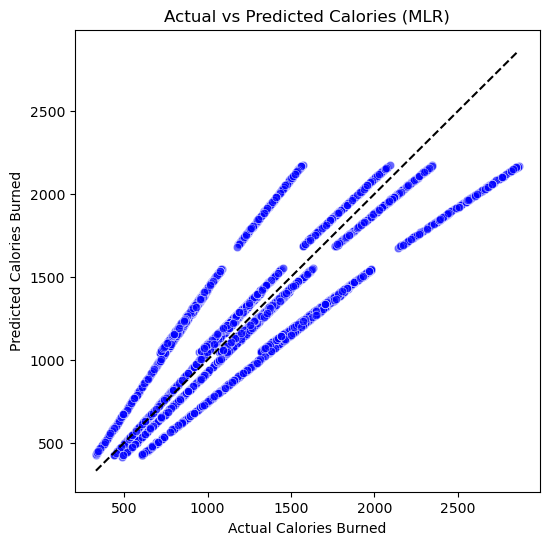

In [37]:
#plotting predicted values vs actual values
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted Calories (MLR)")
plt.show()


===== RANDOM FOREST REGRESSION RESULTS =====
R² Score: 0.618
MAE:      244.33 calories
RMSE:     308.56 calories

===== FEATURE IMPORTANCE =====


,Feature,Importance
0,Session_Duration__hours_,0.544760
5,Experience_Level,0.201707
1,Avg_BPM,0.093121
3,Age,0.090964
4,Workout_Frequency__days_week_,0.048086
2,Height__m_,0.021362


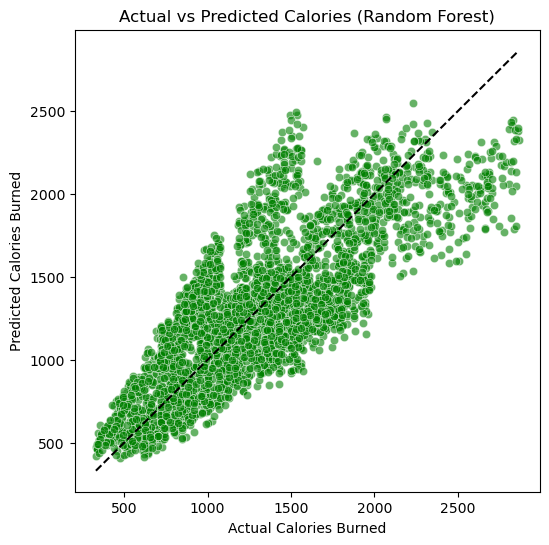

In [38]:
rf = RandomForestRegressor(
    n_estimators=200,     # number of trees
    max_depth=None,       
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=20,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\n===== RANDOM FOREST REGRESSION RESULTS =====")
print(f"R² Score: {r2_rf:.3f}")
print(f"MAE:      {mae_rf:.2f} calories")
print(f"RMSE:     {rmse_rf:.2f} calories")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n===== FEATURE IMPORTANCE =====")
display(importance_df)
# plt.figure(figsize=(8,5))
# sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
# plt.title("Feature Importance - Random Forest")
# plt.show()

#plotting predicted vs actual value
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted Calories (Random Forest)")
plt.show()


In [39]:
def predict_calories(rf_model, scaler, input_data, feature_names):
 
    df_input = pd.DataFrame([input_data])
    df_input = df_input[feature_names]

    # Scale input 
    X_scaled = scaler.transform(df_input)

    # Predict
    predicted = rf_model.predict(X_scaled)[0]

    print(f"Predicted Calories Burned: {predicted:.2f}")
    return predicted

In [40]:
new_session = {
    "Session_Duration__hours_": 0.5,
    "Avg_BPM": 154,
    "Weight_kg": 55,
    "Height__m_": 172,
    "Age":25,
    "Workout_Frequency__days_week_": 1,
    "Experience_Level": 0
}
predicted_calories = predict_calories(rf, scaler, new_session, features)

Predicted Calories Burned: 500.13


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RQ2: Can an individual’s health status (Fit / Moderate / At-Risk) be predicted using lifestyle habits and biometric indicators such as BMI, workout frequency, calorie intake, water consumption, and fitness experience level?


In [41]:
#reference: https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

if "Health_Status" not in df.columns:
    def bmi_to_status(bmi):
        if bmi < 18.5:
            return "At_Risk"
        elif bmi < 25:
            return "Fit"
        elif bmi < 30:
            return "Moderate"
        else:
            return "At_Risk"
    df["Health_Status"] = df["BMI"].apply(bmi_to_status)

In [42]:
features = [
    "BMI",
    "Weight_kg",
    "Height__m_",
    "Age",
    "Gender",
    "Workout_Frequency__days_week_",
    "Water_Intake__liters_",
    "Proteins",
    "Carbs",
    "Fats",
    "Experience_Level"
]
features = [f for f in features if f in df.columns]

target = "Health_Status"

In [43]:
df = df.dropna(subset=[target])

X = df[features]
y = df[target]

print("\nFeatures used:", features)
print("Target:", target)


Features used: ['BMI', 'Height__m_', 'Age', 'Gender', 'Workout_Frequency__days_week_', 'Water_Intake__liters_', 'Proteins', 'Carbs', 'Fats', 'Experience_Level']
Target: Health_Status


In [44]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [45]:
num_imputer = SimpleImputer(strategy="median")
X_num = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), columns=num_cols)

In [46]:
if cat_cols:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    X_cat_raw = pd.DataFrame(cat_imputer.fit_transform(X[cat_cols]), columns=cat_cols)
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    X_cat = pd.DataFrame(ohe.fit_transform(X_cat_raw),
                         columns=ohe.get_feature_names_out(cat_cols))
    X_processed = pd.concat([X_num.reset_index(drop=True),
                             X_cat.reset_index(drop=True)], axis=1)
else:
    X_processed = X_num.copy()


In [47]:
#scaling 
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_processed), columns=X_processed.columns)

In [48]:
#splitting into train and test samples
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

In [49]:
def evaluate_model(name, model, X_test, y_test, y_pred, y_proba):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.3f}")
    print(f"Macro F1: {f1:.3f}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


===== Logistic Regression =====
Accuracy: 0.488
Macro F1: 0.435

Classification Report:
               precision    recall  f1-score   support

     At_Risk       0.38      0.36      0.37      1468
         Fit       0.57      0.80      0.66      1541
    Moderate       0.43      0.20      0.27       991

    accuracy                           0.49      4000
   macro avg       0.46      0.45      0.43      4000
weighted avg       0.47      0.49      0.46      4000



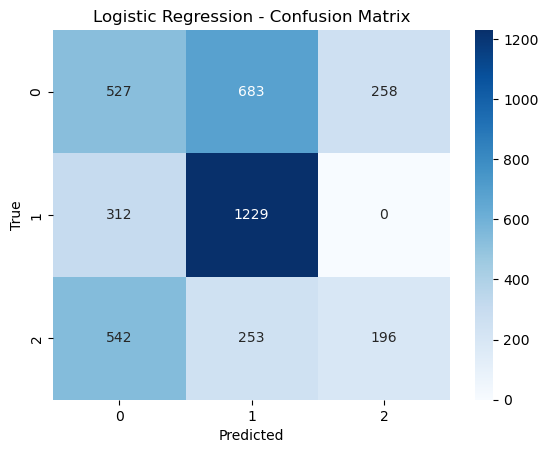


===== Naive Bayes =====
Accuracy: 0.923
Macro F1: 0.921

Classification Report:
               precision    recall  f1-score   support

     At_Risk       0.88      0.93      0.91      1468
         Fit       0.95      0.95      0.95      1541
    Moderate       0.95      0.87      0.91       991

    accuracy                           0.92      4000
   macro avg       0.93      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



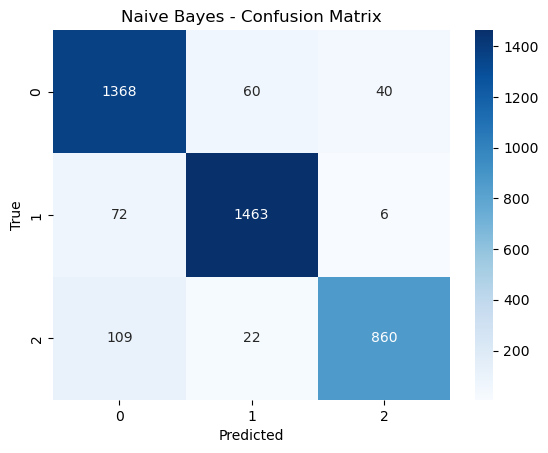

In [50]:
# Logistic Regression
lr = LogisticRegression(max_iter=200, random_state=RANDOM_STATE)
lr.fit(X_train, y_train)
evaluate_model("Logistic Regression", lr, X_test, y_test, lr.predict(X_test), lr.predict_proba(X_test))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_model("Naive Bayes", nb, X_test, y_test, nb.predict(X_test), nb.predict_proba(X_test))

RQ3: Which forms of exercise (Cardio, HIIT, or Strength) yield the highest calorie burn, and how do they differ in efficiency across gender?

In [51]:
print(df.columns)

Index(['Age', 'Gender', 'Weight__kg_', 'Height__m_', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration__hours_', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake__liters_',
       'Workout_Frequency__days_week_', 'Experience_Level', 'BMI',
       'Daily_meals_frequency', 'Physical_exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name_of_Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns_Calories__per_30_min_', 'Target_Muscle_Group',
       'Equipment_Needed', 'Difficulty_Level', 'Body_Part', 'Type_of_Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg',
       'Burns_Calories__per_30_min__bc', 'Health_Status'],
      dtype='object')


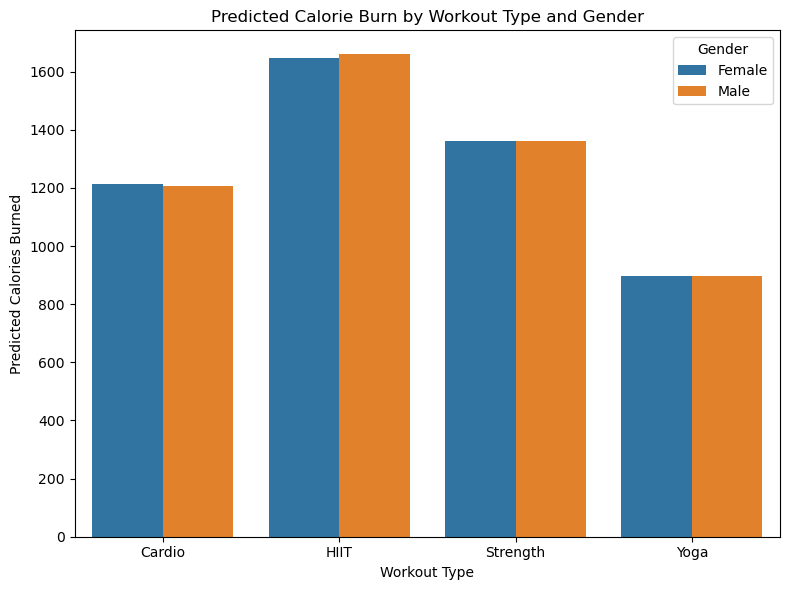

  Workout_Type_Label Gender_Label  Predicted_Calories
0             Cardio       Female         1214.977696
1             Cardio         Male         1208.127891
2               HIIT       Female         1645.818538
3               HIIT         Male         1659.083260
4           Strength       Female         1362.722171
5           Strength         Male         1359.946562
6               Yoga       Female          896.795180
7               Yoga         Male          897.399425


In [52]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

final_df = pd.read_csv("/Users/dishasanthosh/Desktop/Group 2-IMT574/Data/Final_data.csv")

features = [
    'Workout_Type', 'Gender', 'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage',
    'Session_Duration (hours)', 'Experience_Level'
]
target = 'Calories_Burned'

# Drop rows with missing values in selected columns
final_df_pred = final_df[features + [target]].dropna()

# Encode categorical variables
le_workout = LabelEncoder()
le_gender = LabelEncoder()
le_experience = LabelEncoder()

final_df_pred['Workout_Type_enc'] = le_workout.fit_transform(final_df_pred['Workout_Type'])
final_df_pred['Gender_enc'] = le_gender.fit_transform(final_df_pred['Gender'])
final_df_pred['Experience_Level_enc'] = le_experience.fit_transform(final_df_pred['Experience_Level'])

# Prepare feature matrix X and target vector y
X = final_df_pred[['Workout_Type_enc', 'Gender_enc', 'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage',
             'Session_Duration (hours)', 'Experience_Level_enc']]
y = final_df_pred[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Analyze predicted calorie burn by workout type and gender
final_df_pred['Predicted_Calories'] = rf.predict(X)
final_df_pred['Workout_Type_Label'] = le_workout.inverse_transform(final_df_pred['Workout_Type_enc'])
final_df_pred['Gender_Label'] = le_gender.inverse_transform(final_df_pred['Gender_enc'])

summary = final_df_pred.groupby(['Workout_Type_Label', 'Gender_Label'])['Predicted_Calories'].mean().reset_index()

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
 
print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

plt.figure(figsize=(8,6))
sns.barplot(data=summary, x='Workout_Type_Label', y='Predicted_Calories', hue='Gender_Label')
plt.title('Predicted Calorie Burn by Workout Type and Gender')
plt.ylabel('Predicted Calories Burned')
plt.xlabel('Workout Type')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

print(summary)
